<a href="https://colab.research.google.com/github/rileyseefeldt/IEE380CodeRepo/blob/main/IEE380Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Column: AGE Index: 4
Column: EDUC Index: 6
Column: MARRIED Index: 8
Column: CHECKING Index: 105
       AGE  EDUC  MARRIED  CHECKING
130     19     9        2       520
131     19     9        2       140
132     19     9        2        60
133     19     9        2        50
134     19     9        2       230
150     23     9        2       300
895     21     9        2      2500
896     21     9        2      2900
897     21     9        2      2300
899     21     9        2      2400
1805    25    10        2       310
1806    25    10        2       320
1807    25    10        2       290
2005    23     9        2       700
2880    21     9        2      1200
2975    21     9        2      1500
3205    22    10        2      2400
3206    22    10        2      1000
3207    22    10        2      2200
3208    22    10        2      1300
3209    22    10        2      1400
3585    23     9        2       150
3588    23     9        2       160
4250    25    10        2        20
4251

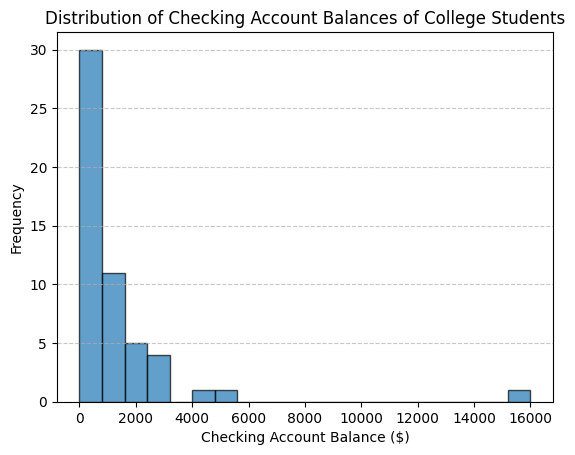

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#loading file from Federal Reserve 2022 CSV Database
file = pd.read_csv("SCFP2022.csv")

#Searching for variales relevant to analysis
target_columns = ['checking', 'age', 'educ', 'married']
index_columns = []
i=0
for col in file.columns:
  if col.lower() in target_columns:
    print("Column:",col, "Index:", i)
    index_columns.append(i)
  i = i + 1

#INDEX COLLUMS ORDER FORMATTED AS
# [AGE, EDUC, MARRIED, CHECKING]
age_index = index_columns[0]
educ_index = index_columns[1]
married_index = index_columns[2]
checking_index = index_columns[3]

college_students = file[
    (file.iloc[:, age_index] >= 18) &  # Age >= 18
    (file.iloc[:, age_index] <= 25) &  # Age <= 24
    (file.iloc[:, married_index] == 2) &  #Not Married
    (file.iloc[:, educ_index].isin([9, 10, 11]))  # Education: Some college or associate's degree
]
#filtering data to only include relevant columns
college_students = college_students.iloc[:, [age_index, educ_index, married_index, checking_index]]
college_students = college_students.drop_duplicates()
#printing up to first 100 instances of the data
#NOTE: There are 53 total entries which match criteria
print(college_students.head(100))

#plotting histogram of data
plt.hist(college_students['CHECKING'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Checking Account Balances of College Students')
plt.xlabel('Checking Account Balance ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
